# Protected Areas
Total reef area according to level of protection: unprotected area, marine protected area, fully or highly protected area.

_Author: Peter Kerins_  
_Created: 11 May 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Horizontal bar chart
- Value is reef area at each protection level
- Single stacked bar per region (for global version)

### Data
[ocn.calcs.008 Coral Reefs in Protected and No-Take Areas](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_008_reefs_mpa_notake)  

- [Global Distribution of Coral Reefs](https://data.unep-wcmc.org/datasets/1) from WCMC ([bio.004.rw2 Coral Reef Locations](https://resourcewatch.carto.com/u/wri-rw/tables/bio_004a_coral_reef_locations_edit/))    
- [Marine Protected Areas](https://www.protectedplanet.net/en/thematic-areas/marine-protected-areas) from WDPA ([bio.007b.rw0.nrt Marine Protected Areas]())  
- [No-Take Zones]() from MPAtlas ([ocn.018.rw0.nrt Fully and Highly Protected Marine Areas]())  

## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Specifications

## Original
Made prior to the availability of no-take zone data.  
[ocn.calcs.005 Reef Area Inside and Outside MPAs](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_005_reef_area_inside_outside_mpas)  

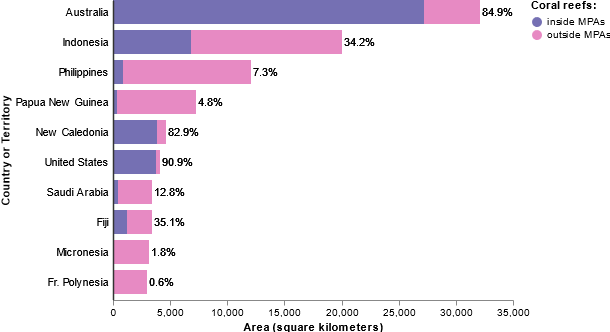

In [4]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT country, status, status_area, fraction_inside, total_area FROM ocn_calcs_005_reef_area_inside_outside_mpas WHERE country IN ('Australia','Indonesia','Philippines','Papua New Guinea','New Caledonia','United States','Saudi Arabia','Fiji','Micronesia','Fr. Polynesia') ORDER BY total_area DESC, status ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "groupby": [
            "country"
          ],
          "field": "status_area",
          "sort": {
            "field": [
              "status"
            ],
            "order": [
              "ascending"
            ]
          },
          "as": [
            "x0",
            "x1"
          ]
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "yscale",
      "type": "band",
      "domain": {
        "data": "table",
        "field": "country"
      },
      "range": "height",
      "padding": 0
    },
    {
      "name": "xscale",
      "type": "linear",
      "domain": {
        "data": "table",
        "field": "total_area"
      },
      "range": "width",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "status"
      },
      "range": [
        "#7570b3",
        "#e78ac3"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Country or Territory",
      "tickSize": 0,
      "labelPadding": 5,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {
              "signal": "datum.value"
            },
            "fill": {
              "value": "black"
            },
            "angle": {
              "value": 0
            },
            "align": {
              "value": "right"
            },
            "fontSize": {
              "value": "11"
            },
            "baseline": {
              "value": "middle"
            },
            "dy": {
              "value": -2
            },
            "dx": {
              "value": 0
            }
          },
          "hover": {
            "fill": {
              "value": "firebrick"
            }
          }
        },
        "domain": {
          "update": {
            "stroke": {
              "value": "#333"
            },
            "strokeWidth": {
              "value": 1.5
            }
          }
        }
      }
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "title": "Area (square kilometers)",
      "labelOverlap": true
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "y": {
            "scale": "yscale",
            "field": "country"
          },
          "height": {
            "scale": "yscale",
            "band": 1,
            "offset": -6
          },
          "x": {
            "scale": "xscale",
            "field": "x0"
          },
          "x2": {
            "scale": "xscale",
            "field": "x1"
          },
          "fill": {
            "scale": "color",
            "field": "status"
          },
          "tooltip": {
            "signal": "{'Country/Territory':datum.country,'Status':upper(slice(datum.status,0,1))+slice(datum.status,1),'Area':format(round(datum.status_area),',')+ ' sq. km'}"
          }
        },
        "update": {
          "fillOpacity": {
            "value": 1
          }
        },
        "hover": {
          "fillOpacity": {
            "value": 0.5
          }
        }
      }
    },
    {
      "type": "text",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "xscale",
            "field": "total_area",
            "offset": 2
          },
          "y": {
            "scale": "yscale",
            "field": "country",
            "offset": 7
          },
          "align": {
            "value": ""
          },
          "baseline": {
            "value": "top"
          },
          "text": {
            "signal": "format(datum.fraction_inside, '.1%')"
          },
          "tooltip": {
            "signal": "'Reefs within national waters inside MPAs'"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": [
        "Coral reefs:"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Global
Contains bar for each region

### SQL

```sql
SELECT * FROM ocn_calcs_008_reefs_mpa_notake
```

In [4]:
# spec=json.loads("""

# """)
# vegaview=dict(spec)
# Vega(vegaview)

## Regional

### SQL
Note that regional filtering happens within widget via transform

```sql
SELECT * FROM ocn_calcs_007_local_threats
```

### Specification

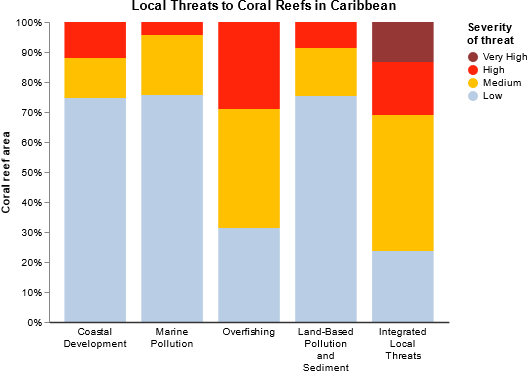

In [7]:
spec=json.loads("""

""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)